In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
dataset = pd.read_csv("data.csv")

In [4]:
dataset.head()


,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [6]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [7]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)


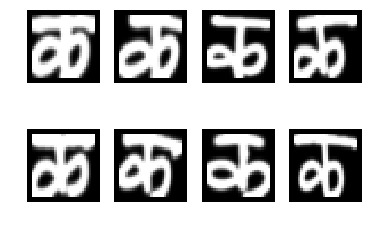

In [8]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
dataset.iloc[:,1024].value_counts()


character_35_tra             2000
character_13_daa             2000
digit_1                      2000
character_22_pha             2000
digit_9                      2000
character_06_cha             2000
character_21_pa              2000
digit_4                      2000
character_15_adna            2000
character_07_chha            2000
digit_7                      2000
character_19_dha             2000
digit_3                      2000
character_09_jha             2000
character_32_patalosaw       2000
character_02_kha             2000
digit_5                      2000
character_08_ja              2000
character_03_ga              2000
character_29_waw             2000
character_14_dhaa            2000
digit_8                      2000
digit_2                      2000
character_11_taamatar        2000
character_01_ka              2000
character_28_la              2000
character_18_da              2000
character_10_yna             2000
character_33_ha              2000
character_05_k

In [10]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([], dtype=int64),)

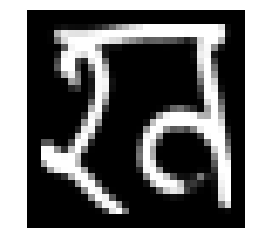

In [11]:
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [12]:
dataset = dataset.drop(dataset.index[rows_to_remove[0]])


In [13]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y_d = dataset.iloc[:,-1]

In [14]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

In [15]:
X = X / 255

In [16]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model = baseline_model()

epochs = 10
batch_size = 400
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 177s - loss: 1.2661 - acc: 0.6688 - val_loss: 0.7935 - val_acc: 0.7916
Epoch 2/10
 - 170s - loss: 0.5917 - acc: 0.8440 - val_loss: 0.5134 - val_acc: 0.8609
Epoch 3/10
 - 169s - loss: 0.3711 - acc: 0.9049 - val_loss: 0.3940 - val_acc: 0.8936
Epoch 4/10
 - 168s - loss: 0.2581 - acc: 0.9358 - val_loss: 0.3330 - val_acc: 0.9097
Epoch 5/10
 - 181s - loss: 0.1873 - acc: 0.9544 - val_loss: 0.2949 - val_acc: 0.9168
Epoch 6/10
 - 198s - loss: 0.1384 - acc: 0.9685 - val_loss: 0.2630 - val_acc: 0.9266
Epoch 7/10
 - 317s - loss: 0.1010 - acc: 0.9791 - val_loss: 0.2530 - val_acc: 0.9290
Epoch 8/10
 - 244s - loss: 0.0754 - acc: 0.9860 - val_loss: 0.2400 - val_acc: 0.9335
Epoch 9/10
 - 180s - loss: 0.0574 - acc: 0.9907 - val_loss: 0.2295 - val_acc: 0.9347
Epoch 10/10
 - 180s - loss: 0.0408 - acc: 0.9953 - val_loss: 0.2298 - val_acc: 0.9361


In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 93.48%


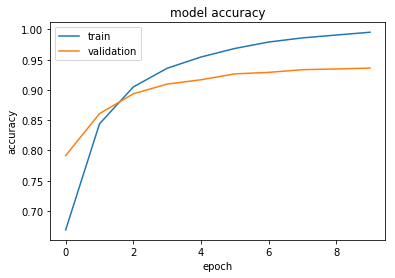

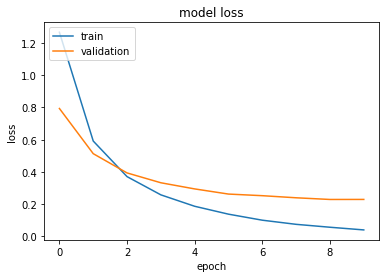

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()